In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Look Then leap Strategy with only 3 stores**

In [5]:
shoes = [1, 2, 3] # 1 is the best shoes, 3 is the worst

NUM_OF_SIMULATIONS = 10000
chosen_shoe = []

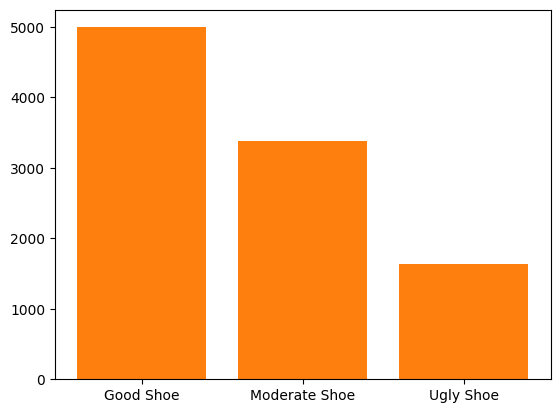

In [6]:
shoes = np.array([1, 2, 3])
labels = ['Good Shoe', 'Moderate Shoe', 'Ugly Shoe']

for _ in range(NUM_OF_SIMULATIONS):
    # Shuffling because we don't the know the order in which we'll see the shoes
    np.random.shuffle(shoes)
    
    first_shoe = shoes[0]
    second_shoe = shoes[1]
    third_shoe = shoes[2]


    if second_shoe < first_shoe:
        chosen_shoe.append(second_shoe)
    else:
        chosen_shoe.append(third_shoe)

plt.hist(chosen_shoe)
plt.xticks(np.arange(1, 4, step=1))

plt.hist(chosen_shoe, bins=np.arange(1, 5, 1), align='left', rwidth=0.8)
plt.gca().set_xticklabels(labels)
plt.show()

**When there are Multiple Stores**

In [7]:
def simulate_shoe_problem(n, k):
    # Generating shoes and shuffling
    rankings = list(range(1, n + 1))
    random.shuffle(rankings)
    
    # Look phase, reject all and keep track of best
    best_seen = float('inf')
    for look in range(k):
        if rankings[look] < best_seen:
            best_seen = rankings[look]
    
    # Leap phase, choose the first that beats the best seen so far
    for leap in range(k, n):
        if rankings[leap] < best_seen:
            return rankings[leap]
        
    return rankings[-1]

The best stopping point is:  33 th store with  0.3835 probability of getting best shoe


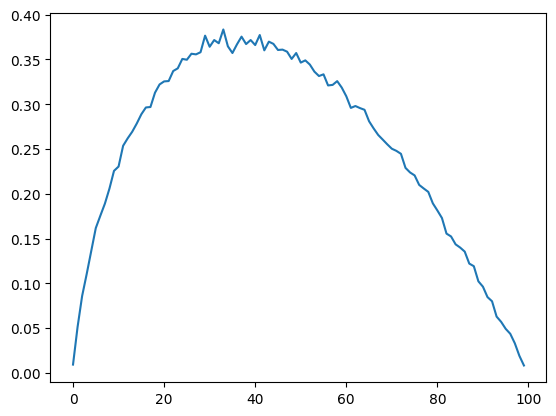

In [15]:
if __name__ == "__main__":
    CANDIDATE_POOL_SIZE = 100 # (n)
    NUM_SIMULATIONS = 10000

    outcomes = []
    for ltl_threshold in range(CANDIDATE_POOL_SIZE): # look then leap threshold (k)
        best_shoe_count = 0
        for _ in range(NUM_SIMULATIONS):
            chosen_shoe = simulate_shoe_problem(CANDIDATE_POOL_SIZE, ltl_threshold)
            if chosen_shoe == 1:
                best_shoe_count += 1
        outcomes.append(best_shoe_count / NUM_SIMULATIONS)

    plt.plot(outcomes)
    print("The best stopping point is: ", outcomes.index(max(outcomes)), "th store with ", max(outcomes), "probability of getting best shoe" )
    plt.show()

**What if there could be rejections?**

In [9]:
def simulate_rejection(n, k, p):
    rankings = list(range(1, n + 1))
    random.shuffle(rankings)

    # Look phase
    best_seen = float('inf')
    for look in range(k):
        if rankings[look] < best_seen:
            best_seen = rankings[look]

    # Leap phase, but with rejection
    for leap in range(k, n):
        if rankings[leap] < best_seen:
            # if rejected, continue to next candidate
            if random.random() < p:
                continue
            return rankings[leap]
    return rankings[-1]

The best stopping point when p= 0.9 is 20 th store with  0.0793 probability of getting best shoe


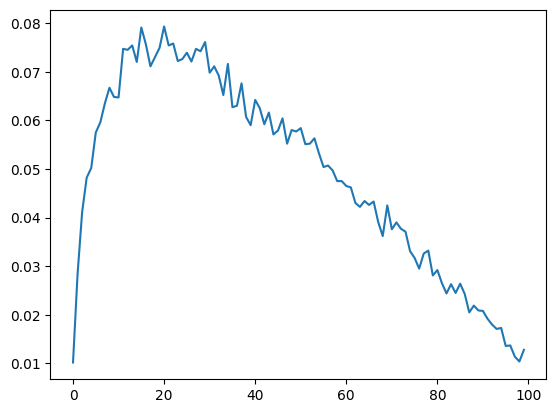

In [10]:
if __name__ == "__main__":
    CANDIDATE_POOL_SIZE = 100 # (n)
    NUM_SIMULATIONS = 10000
    rejection_probability = 0.9 #rejection probability
    outcomes = []
    for ltl_threshold in range(CANDIDATE_POOL_SIZE): # look then leap threshold (k)
        best_apt_count = 0
        for _ in range(NUM_SIMULATIONS):
            chosen_apt = simulate_rejection(CANDIDATE_POOL_SIZE, ltl_threshold, p = rejection_probability)
            if chosen_apt == 1:
                best_apt_count += 1
        outcomes.append(best_apt_count / NUM_SIMULATIONS)

    plt.plot(outcomes)
    print("The best stopping point when p=", rejection_probability, "is", outcomes.index(max(outcomes)), "th store with ", max(outcomes), "probability of getting best shoe" )
    plt.show()

The best stopping point when p= 0.1 is 36 th store with  0.3526 probability of getting best shoe


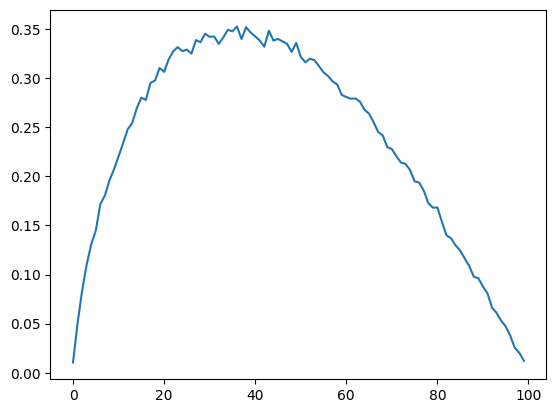

In [11]:
if __name__ == "__main__":
    CANDIDATE_POOL_SIZE = 100 # (n)
    NUM_SIMULATIONS = 10000
    rejection_probability = 0.1 #rejection probability
    outcomes = []
    for ltl_threshold in range(CANDIDATE_POOL_SIZE): # look then leap threshold (k)
        best_apt_count = 0
        for _ in range(NUM_SIMULATIONS):
            chosen_apt = simulate_rejection(CANDIDATE_POOL_SIZE, ltl_threshold, p = rejection_probability)
            if chosen_apt == 1:
                best_apt_count += 1
        outcomes.append(best_apt_count / NUM_SIMULATIONS)

    plt.plot(outcomes)
    print("The best stopping point when p=", rejection_probability, "is", outcomes.index(max(outcomes)), "th store with ", max(outcomes), "probability of getting best shoe" )
    plt.show()

**What if we could go back some previous option?**

In [12]:
def simulate_going_back(n, k, p=0.5):
    rankings = list(range(1, n + 1))
    random.shuffle(rankings)

    # Look phase
    best_seen = float('inf')
    for look in range(k):
        if rankings[look] < best_seen:
            best_seen = rankings[look]
    
    # Leap phase
    for leap in range(k, n):
        if rankings[leap] < best_seen:
            return rankings[leap]
    
    # Go back phase
    # Go to the best candidate you saw in the look phase
    # If rejected, move onto the second best, etc.
    best_seens = sorted(rankings[:k])
    for go_back in range(k):
        if random.random() < p:
            continue
        return best_seens[go_back]

    return best_seens[-1]

The best stopping point when p= 0.5 is 56 th store with  0.6144 probability of getting best shoe


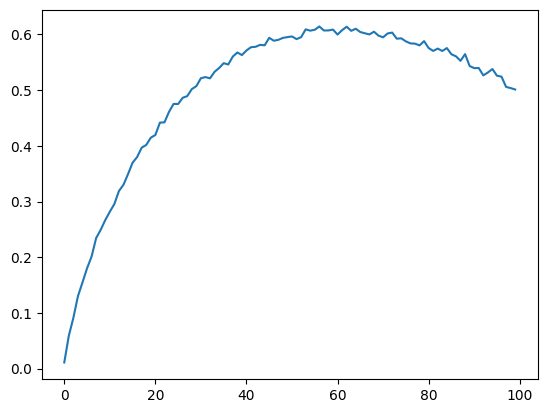

In [13]:
if __name__ == "__main__":
    CANDIDATE_POOL_SIZE = 100 # (n)
    NUM_SIMULATIONS = 10000
    rejection_probability = 0.5 #rejection probability
    outcomes = []
    for ltl_threshold in range(CANDIDATE_POOL_SIZE): # look then leap threshold (k)
        best_apt_count = 0
        for _ in range(NUM_SIMULATIONS):
            chosen_apt = simulate_going_back(CANDIDATE_POOL_SIZE, ltl_threshold, p = rejection_probability)
            if chosen_apt == 1:
                best_apt_count += 1
        outcomes.append(best_apt_count / NUM_SIMULATIONS)

    plt.plot(outcomes)
    print("The best stopping point when p=", rejection_probability, "is", outcomes.index(max(outcomes)), "th store with ", max(outcomes), "probability of getting best shoe" )
    plt.show()

The best stopping point when p= 0.9 is 41 th store with  0.4177 probability of getting best shoe


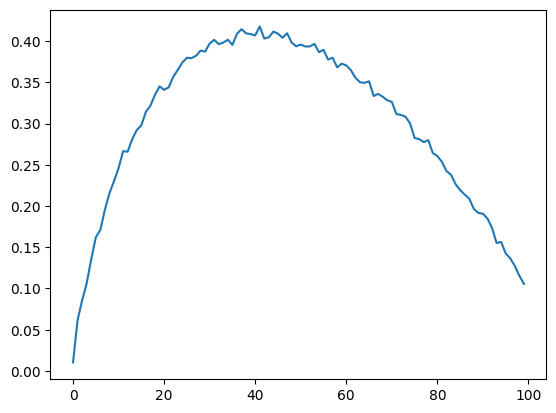

In [14]:
if __name__ == "__main__":
    CANDIDATE_POOL_SIZE = 100 # (n)
    NUM_SIMULATIONS = 10000
    rejection_probability = 0.9 #rejection probability
    outcomes = []
    for ltl_threshold in range(CANDIDATE_POOL_SIZE): # look then leap threshold (k)
        best_apt_count = 0
        for _ in range(NUM_SIMULATIONS):
            chosen_apt = simulate_going_back(CANDIDATE_POOL_SIZE, ltl_threshold, p = rejection_probability)
            if chosen_apt == 1:
                best_apt_count += 1
        outcomes.append(best_apt_count / NUM_SIMULATIONS)

    plt.plot(outcomes)
    print("The best stopping point when p=", rejection_probability, "is", outcomes.index(max(outcomes)), "th store with ", max(outcomes), "probability of getting best shoe" )
    plt.show()